# Baseline Model for Image Reconstruction
This notebook evaluates a baseline model for reconstructing masked images in the test set. The baseline replaces black square regions with random pixel values.

The process involves:
- Loading test set images (masked and original).
- Implementing the baseline model by filling the black square with random values.
- Computing MSE and MAE between reconstructed and original images.
- Visualizing the masked images and baseline reconstructions.

The reference images are used only for visualization, not for metric calculations.

# Imports
Necessary libraries for image processing, visualization, and evaluation metrics.

In [70]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from find_black_rectangle import find_black_rectangle

# Load Test Set Images
Load masked and original images from the test set directory. Masked images are identified by filenames ending with `_masked.jpg`. The corresponding original images share the same name without `_masked`.

In [71]:
# Define test dataset directory and list image files
test_dir = os.path.join("..", "Dataset", "test")
test_image_files = sorted([f for f in os.listdir(test_dir) if f.endswith('.jpg')])

# Initialize lists for original and masked images
test_images = []
masked_test_images = []

# Separate masked and original images based on filenames
for file_name in test_image_files:
    if "_masked" in file_name:  # Masked images contain '_masked' in the filename
        masked_image_path = os.path.join(test_dir, file_name)
        masked_image = Image.open(masked_image_path).convert("RGB")
        masked_test_images.append(np.array(masked_image))
    else:  # Original images do not contain '_masked'
        original_image_path = os.path.join(test_dir, file_name)
        original_image = Image.open(original_image_path).convert("RGB")
        test_images.append(np.array(original_image))

# Fill Masked Regions with Random RGB Values
This section defines a function to replace black rectangles in images with random RGB values. Masked images are normalized, and the function is applied to reconstruct the test images.

In [72]:
# Function to fill a rectangle in an image with random RGB values
def fill_random_rectangle(image, y_min, y_max, x_min, x_max):
    """
    Fill a rectangular region in the image with random RGB values.
    """
    # Clamp rectangle coordinates to image boundaries
    y_min = max(0, y_min)
    y_max = min(image.shape[0], y_max)
    x_min = max(0, x_min)
    x_max = min(image.shape[1], x_max)

    # Fill the rectangle with random values
    image[y_min:y_max, x_min:x_max, :] = np.random.rand(y_max - y_min, x_max - x_min, 3)
    return image

# Normalize masked images to [0, 1]
normalized_test_images = [img.astype(np.float32) / 255.0 for img in masked_test_images]

# Reconstruct images by filling masked areas with random RGB values
reconstructed_test_images = []
for normalized_image in normalized_test_images:
    # Get coordinates of the masked rectangle
    y_min, y_max, x_min, x_max = find_black_rectangle(normalized_image)

    # Fill the masked region with random RGB values
    reconstructed_image = fill_random_rectangle(normalized_image.copy(), y_min, y_max, x_min, x_max)
    reconstructed_test_images.append(reconstructed_image)

# Calculate Metrics
Compute the Mean Squared Error (MSE) and Mean Absolute Error (MAE) between the reconstructed and original images in the test set.

In [73]:
# Initialize lists to store MSE and MAE for each image pair
mse_list = []
mae_list = []

# Convert reconstructed and test images back to [0, 255] range
unnormalized_reconstructed_images = [
    (reconstructed_image * 255.0).astype(np.float32) for reconstructed_image in reconstructed_test_images
]
unnormalized_test_images = [
    (test_image * 255.0).astype(np.float32) for test_image in normalized_test_images
]

# Calculate MSE and MAE for each image pair
for reconstructed, original in zip(unnormalized_reconstructed_images, unnormalized_test_images):
    mse_list.append(mean_squared_error(original.flatten(), reconstructed.flatten()))
    mae_list.append(mean_absolute_error(original.flatten(), reconstructed.flatten()))


# Compute average MSE and MAE across all image pairs
average_mse = np.mean(mse_list)
average_mae = np.mean(mae_list)

# Print the results
print(f"Baseline MSE: {average_mse:.4f}")
print(f"Baseline MAE: {average_mae:.4f}")

Baseline MSE: 1139.2030
Baseline MAE: 7.0292


# Visualize Results
Display the masked images and reconstructed images for comparison. The reference images, taken from the test set, are used only for visualizing how the reconstructed images compare to the originals.


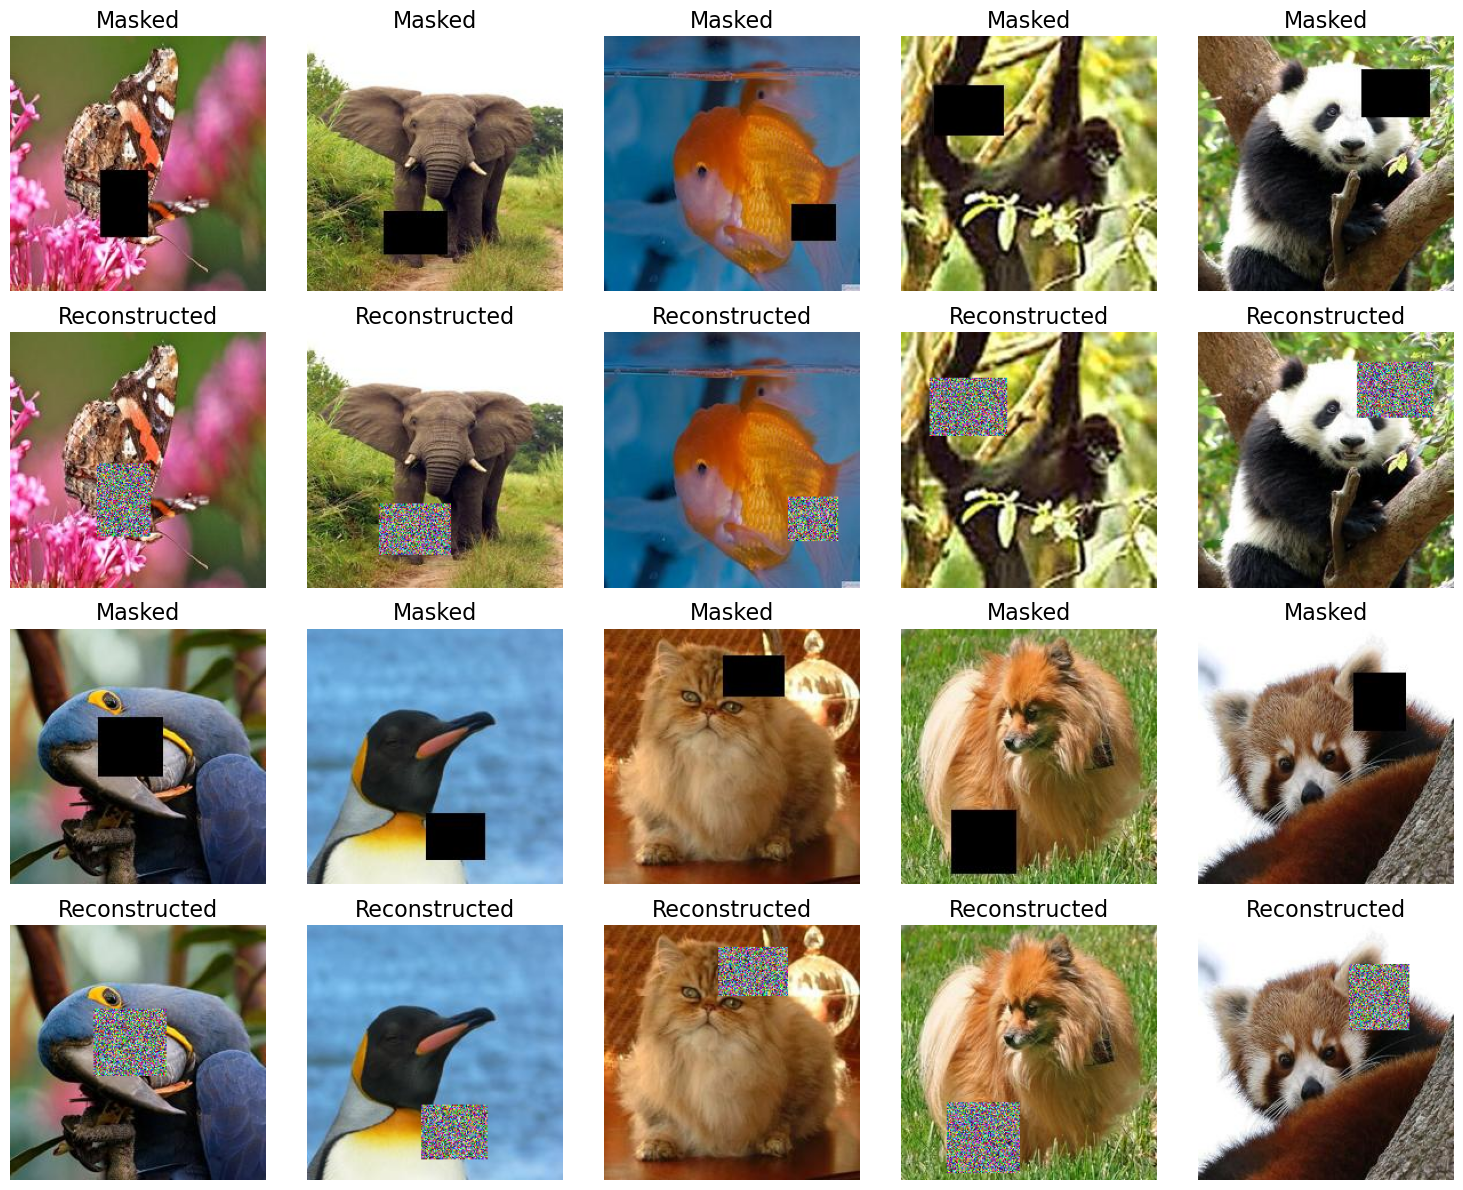

In [74]:
# Path to the Reference_Images directory
reference_images_dir = os.path.join("..", "Reference_Images")
masked_image_files = sorted(os.listdir(reference_images_dir))

# Load and normalize images
masked_images = []
for file_name in masked_image_files[:10]:  # Limit to the first 10 images
    image_path = os.path.join(reference_images_dir, file_name)
    image = Image.open(image_path).convert("RGB")  # Open image in RGB format
    image_array = np.array(image).astype(np.float32) / 255.0  # Normalize to [0, 1]
    masked_images.append(image_array)

# Generate reconstructed images
reconstructed_images = [
    fill_random_rectangle(
        masked_image.copy(),
        *find_black_rectangle(masked_image)
    )
    for masked_image in masked_images
]

# Visualization with a 4-row grid
fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # 4 rows, 5 columns

for i in range(5):
    # Row 1: Original masked images (first 5)
    axs[0, i].imshow(masked_images[i])
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Masked", fontsize=16)

    # Row 2: Reconstructed images (first 5)
    axs[1, i].imshow(reconstructed_images[i])
    axs[1, i].axis("off")
    axs[1, i].set_title(f"Reconstructed", fontsize=16)

for i in range(5, 10):
    # Row 3: Original masked images (last 5)
    axs[2, i - 5].imshow(masked_images[i])
    axs[2, i - 5].axis("off")
    axs[2, i - 5].set_title(f"Masked", fontsize=16)

    # Row 4: Reconstructed images (last 5)
    axs[3, i - 5].imshow(reconstructed_images[i])
    axs[3, i - 5].axis("off")
    axs[3, i - 5].set_title(f"Reconstructed", fontsize=16)

plt.tight_layout()
plt.show()